In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\adrik\Documents\Cleaned_Dataset\cleaned_dataset.csv")
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,Route
0,Thursday,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,...,0,N,0,2,0,0,0,32,1,IND-BWI
1,Thursday,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,...,0,N,0,10,0,0,0,47,1,IND-LAS
2,Thursday,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,...,0,N,0,8,0,0,0,72,1,IND-MCO
3,Thursday,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,...,0,N,0,3,0,0,0,12,1,IND-PHX
4,Thursday,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,...,0,N,0,0,0,0,0,16,1,IND-TPA


In [3]:
df.isnull().sum()

DayOfWeek               0
Date                    0
DepTime                 0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
Airline                 0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Org_Airport          1177
Dest                    0
Dest_Airport         1479
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
Month                   0
Route                   0
dtype: int64

Route and Airport-Level Analysis

In [4]:
# Top 10 origin airports
top_origin_airports = df['Origin'].value_counts().head(10)
display(top_origin_airports)

Origin
ORD    46945
DFW    33027
ATL    28834
DEN    23542
LAX    17194
LAS    15528
SFO    14825
PHX    13873
MDW     9318
MCO     9043
Name: count, dtype: int64

In [5]:
# Top 10 origin-destination pairs
top_routes = df['Route'].value_counts().head(10)
display(top_routes)

Route
ORD-LGA    1920
LGA-ORD    1615
LAX-SFO    1603
SFO-LAX    1457
LAS-LAX    1305
HOU-DAL    1276
DAL-HOU    1200
ORD-LAX    1154
PHX-LAS    1152
DFW-ORD    1125
Name: count, dtype: int64

In [6]:
# Top 10 destination airports
top_destination_airports = df['Dest'].value_counts().head(10)
display(top_destination_airports)

Dest
ORD    40622
DFW    24543
ATL    23557
DEN    19249
LAX    18350
SFO    15721
LAS    14929
PHX    12517
LGA    10692
SLC     9104
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


Visualizing top 10 origin airports

C:\Users\adrik\AppData\Local\Temp\ipykernel_24560\2605704606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_origin_airports.values, y=top_origin_airports.index, palette='mako')


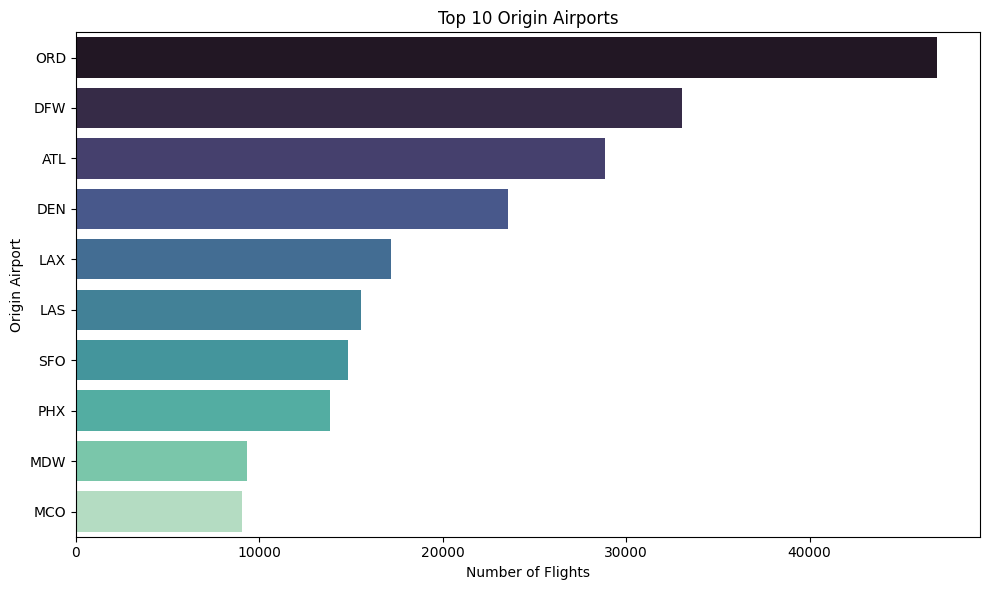

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_origin_airports.values, y=top_origin_airports.index, palette='mako')
plt.title('Top 10 Origin Airports')
plt.xlabel('Number of Flights')
plt.ylabel('Origin Airport')
plt.tight_layout()
plt.show()


Visualizing destination Airports(Top 5)

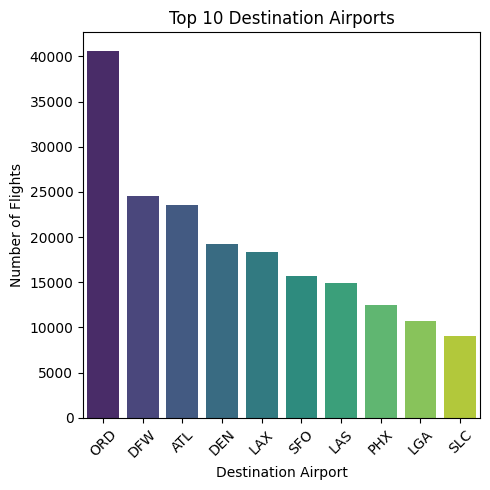

In [11]:
plt.figure(figsize=(5, 5))
sns.barplot(x=top_destination_airports.index, y=top_destination_airports.values, hue=top_destination_airports.index, palette='viridis', legend=False)
plt.title('Top 10 Destination Airports')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualizing Top 10 origin-destinatipon pairs

C:\Users\adrik\AppData\Local\Temp\ipykernel_24560\3076353856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_routes.index, x=top_routes.values, palette='crest')


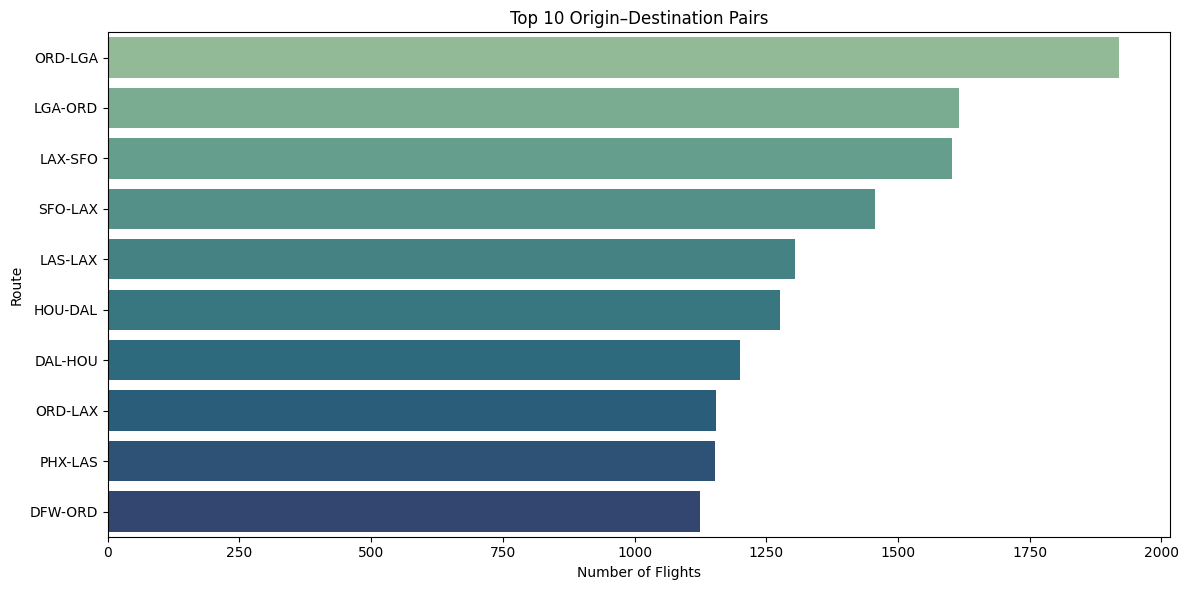

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_routes.index, x=top_routes.values, palette='crest')
plt.title('Top 10 Origin–Destination Pairs')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.tight_layout()
plt.show()


Calculate average arrival and departur delays per route

In [15]:
avg_delays_by_route = df.groupby('Route')[['ArrDelay', 'DepDelay']].mean().reset_index()
display(avg_delays_by_route.head())

,Route,ArrDelay,DepDelay
0,ABE-ATL,89.353846,84.938462
1,ABE-CLT,71.333333,65.166667
2,ABE-CVG,55.000000,48.000000
3,ABE-ORD,86.911765,76.602941
4,ABI-DFW,100.898089,96.821656


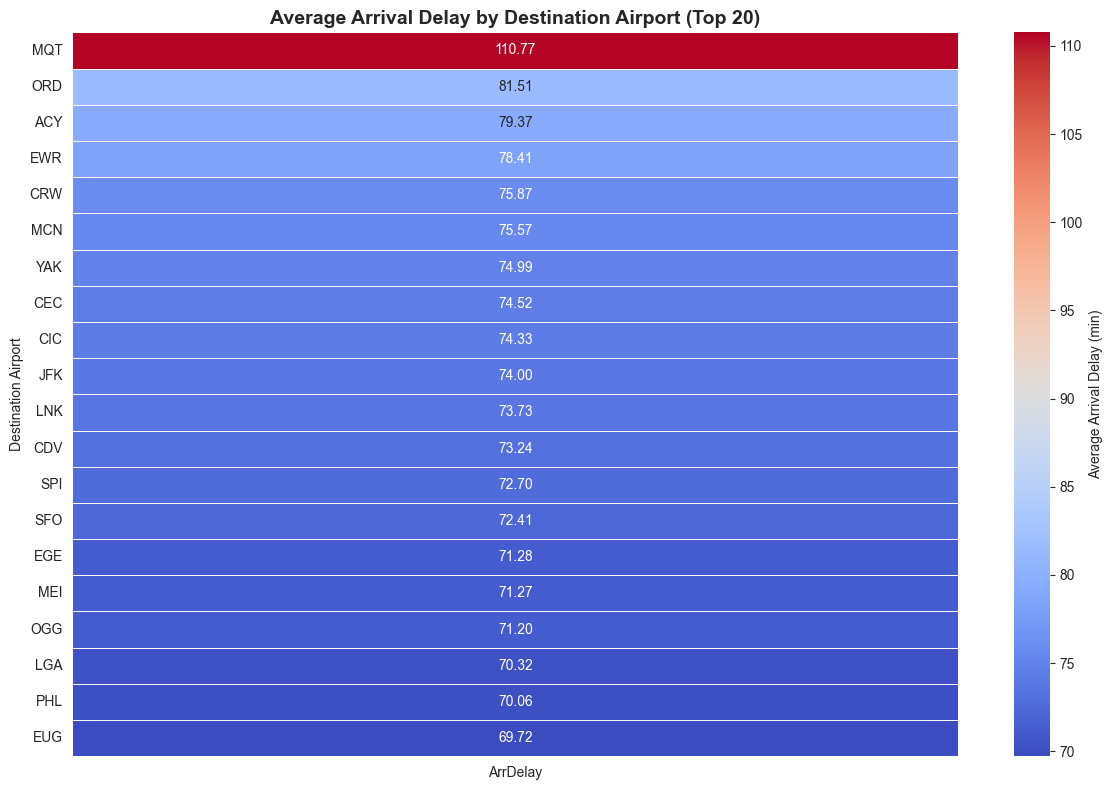

In [18]:
# average arrival delays by destination airport
avg_arrival_delays_by_dest = df.groupby('Dest')['ArrDelay'].mean().reset_index()

# Sort destination airports by average arrival delay and select the top 20
top_20_dest_airports_arr_delay = avg_arrival_delays_by_dest.sort_values(by='ArrDelay', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.heatmap(
    top_20_dest_airports_arr_delay.set_index('Dest'),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Average Arrival Delay (min)'}
)
plt.title('Average Arrival Delay by Destination Airport (Top 20)', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Destination Airport')
plt.tight_layout()
plt.show()



C:\Users\adrik\AppData\Local\Temp\ipykernel_24560\2705429027.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


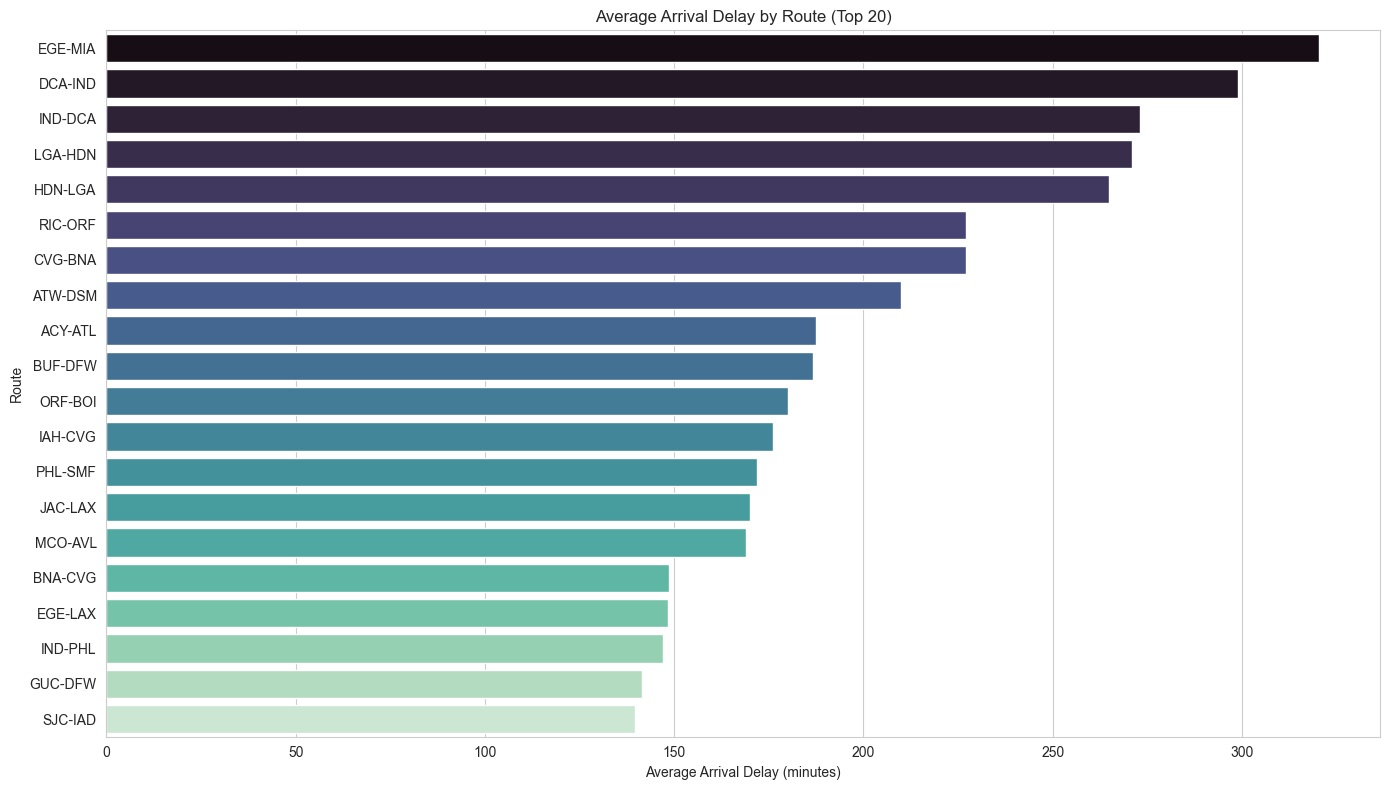

In [ ]:
# Sort routes by average arrival delay and select the top 20
top_20_routes_arr_delay = avg_delays_by_route.sort_values(by='ArrDelay', ascending=False).head(20)

# Create a horizontal bar for average arrival delays by route
plt.figure(figsize=(14, 8))
sns.barplot(
    y='Route',
    x='ArrDelay',
    data=top_20_routes_arr_delay,
    palette='mako'
)
plt.title('Average Arrival Delay by Route (Top 20)')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Route')
plt.tight_layout()
plt.show()


In [20]:
avg_delays_by_origin = df.groupby('Origin')[['ArrDelay', 'DepDelay']].mean()
display(avg_delays_by_origin.head())

,ArrDelay,DepDelay
Origin,,
ABE,86.921986,79.553191
ABI,100.898089,96.821656
ABQ,50.931923,50.514541
ABY,66.427184,64.203883
ACT,61.608696,61.188406


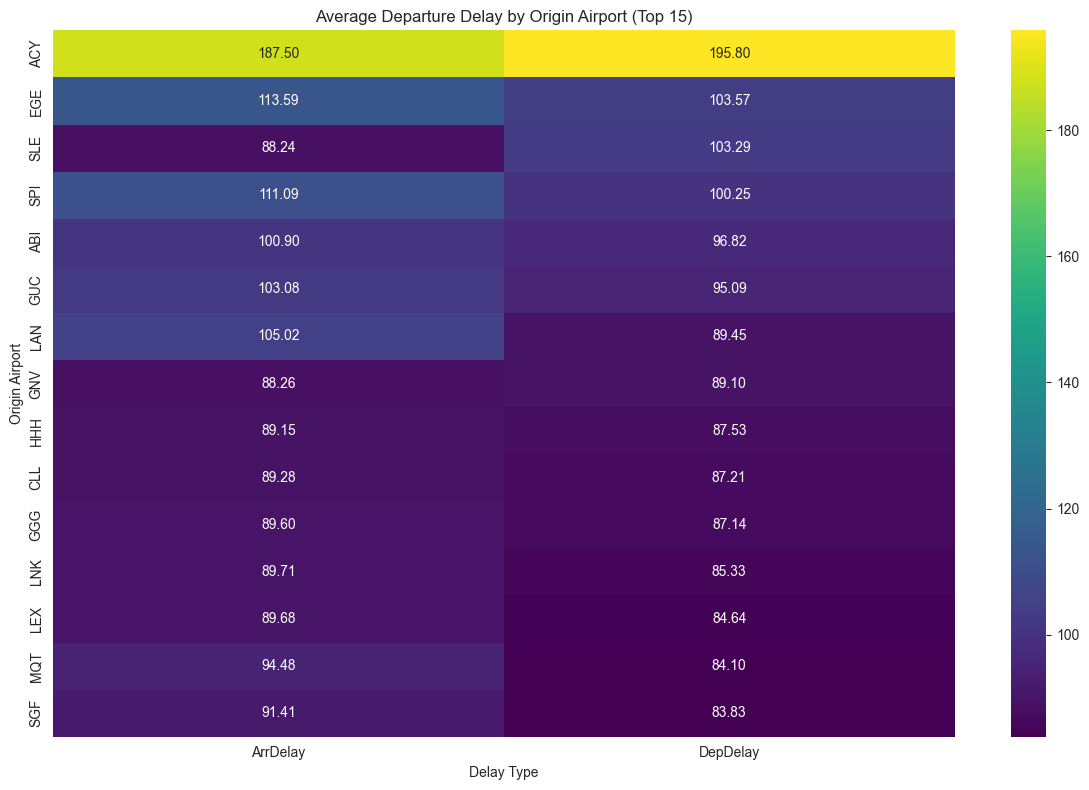

In [22]:
# Sort origin airports by average departure delay and select the top 15
top_20_origin_airports_dep_delay = avg_delays_by_origin.sort_values(by='DepDelay', ascending=False).head(15)

# Create a heatmap for average departure delays by origin airport
plt.figure(figsize=(12, 8))
sns.heatmap(top_20_origin_airports_dep_delay, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Departure Delay by Origin Airport (Top 15)')
plt.xlabel('Delay Type')
plt.ylabel('Origin Airport')
plt.tight_layout()
plt.show()

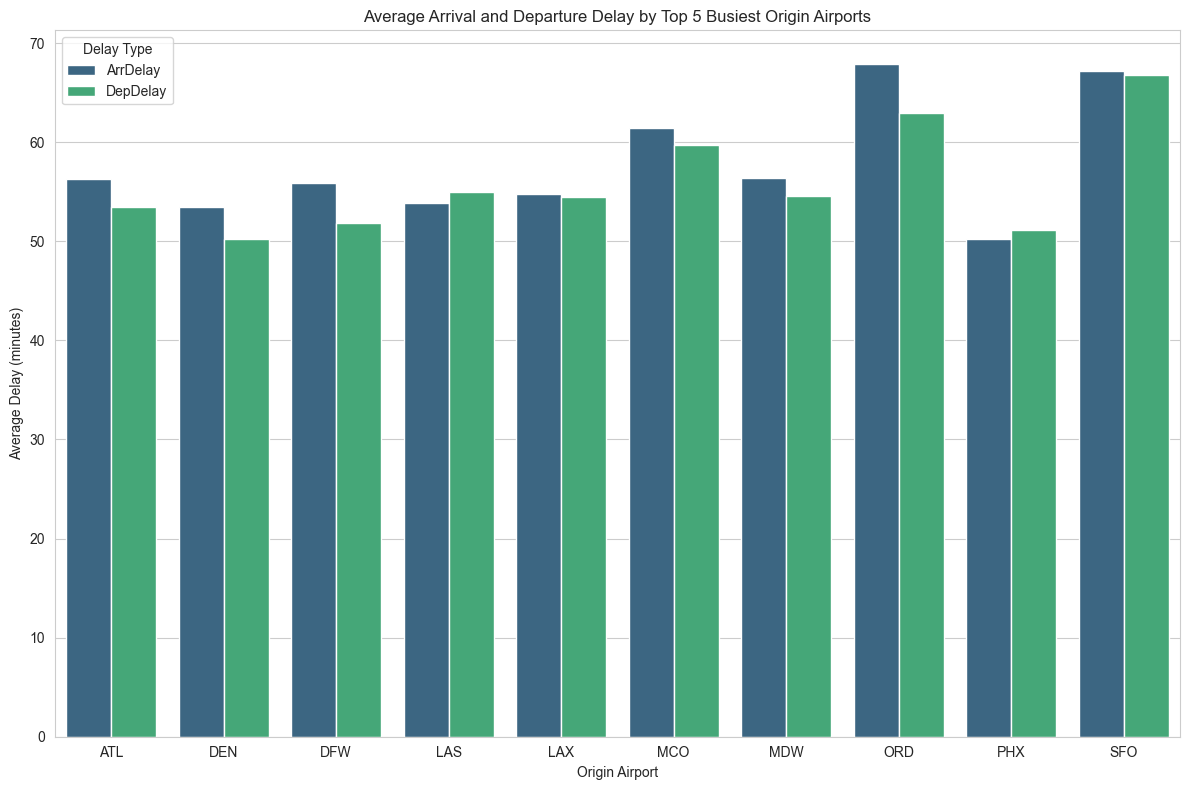

In [ ]:
# Filtering average delays of the top 5 busiest origin airports
top_origin_airports_delay = avg_delays_by_origin[avg_delays_by_origin.index.isin(top_origin_airports.index)]

# Grouped Bar Chart for average delays by top 5 busiest origin airports
top_origin_airports_delay_melted = top_origin_airports_delay.reset_index().melt(id_vars='Origin', var_name='DelayType', value_name='AvgDelay')

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_origin_airports_delay_melted,
    x='Origin',
    y='AvgDelay',
    hue='DelayType',
    palette='viridis'
)
plt.title('Average Arrival and Departure Delay by Top 5 Busiest Origin Airports')
plt.xlabel('Origin Airport')
plt.ylabel('Average Delay (minutes)')
plt.legend(title='Delay Type')
plt.tight_layout()
plt.show()


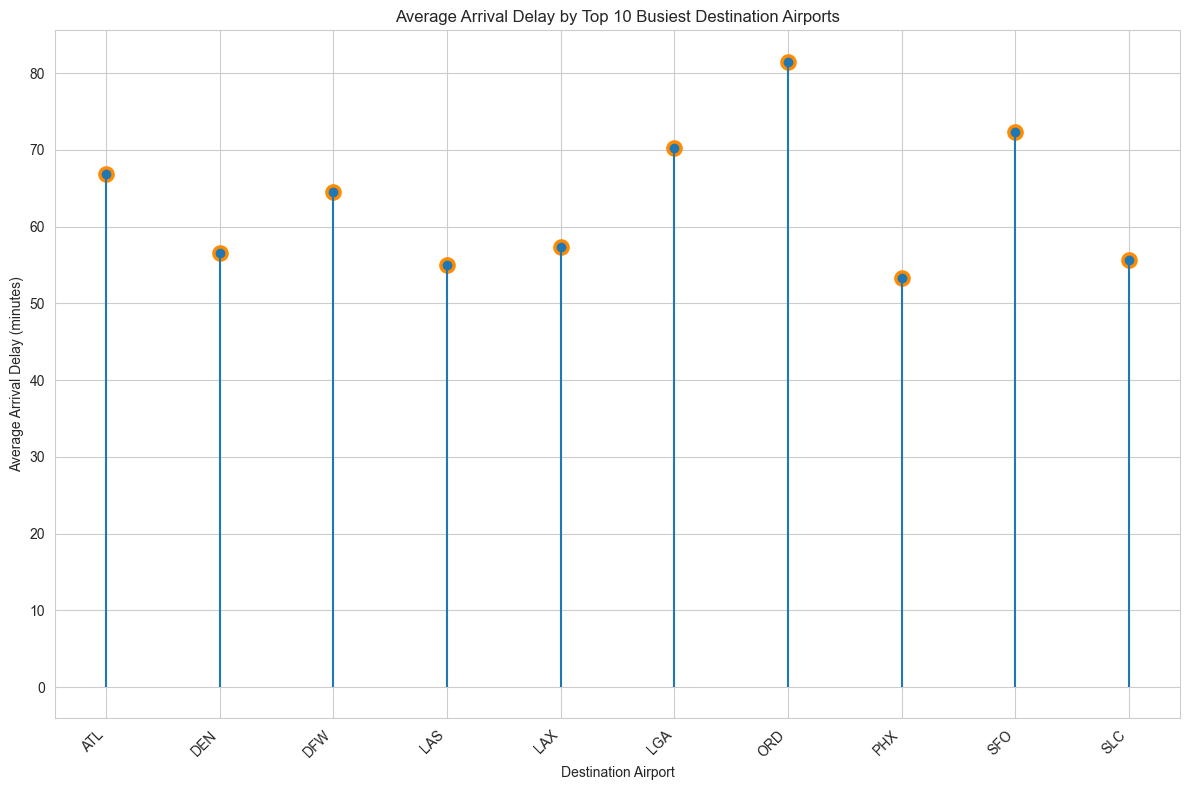

In [ ]:
# Filter average delays to include only the top 20 busiest destination airports
top_destination_airports_delay = avg_arrival_delays_by_dest[avg_arrival_delays_by_dest['Dest'].isin(top_destination_airports.index)].set_index('Dest')

# Create a Lollipop Chart for average arrival delay by top 20 busiest destination airports
plt.figure(figsize=(12, 8))
plt.stem(top_destination_airports_delay.index, top_destination_airports_delay['ArrDelay'], basefmt=" ")
plt.scatter(top_destination_airports_delay.index, top_destination_airports_delay['ArrDelay'], color='darkorange', s=120)
plt.title('Average Arrival Delay by Top 10 Busiest Destination Airports')
plt.xlabel('Destination Airport')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [28]:
#  average delays to include only the top 10 busiest routes
top_10_routes_delay = avg_delays_by_route[avg_delays_by_route['Route'].isin(top_routes.index)]

# top 10 busiest routes by arrival delay
top_10_routes_arr_delay = top_10_routes_delay.sort_values(by='ArrDelay', ascending=False)

#  the arrival delays for the top 10 busiest routes
display(top_10_routes_arr_delay)

,Route,ArrDelay,DepDelay
1781,LGA-ORD,83.090402,72.173994
2343,ORD-LGA,76.192708,68.971354
1057,DFW-ORD,76.085333,68.132444
1731,LAX-SFO,70.684966,66.842171
2341,ORD-LAX,67.683709,59.337955
2939,SFO-LAX,67.328758,67.501716
1353,HOU-DAL,55.131661,50.342476
797,DAL-HOU,53.445000,47.207500
1626,LAS-LAX,49.494253,47.258238
2566,PHX-LAS,48.349826,44.291667
